# Principal Component Analysis

## import library

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [9]:
fname_data = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/12/assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

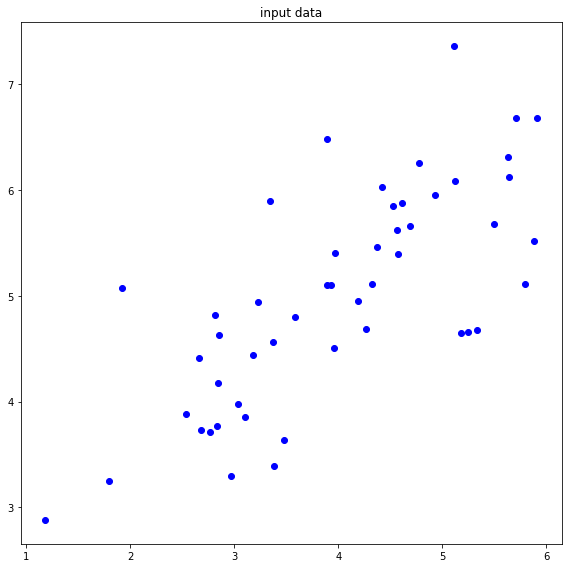

In [10]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.plot(x, y, 'o', color = 'blue')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x = 3.9892652
mean of y = 5.0028060000000005
std of x = 1.161260585149156
std of y = 1.0131222834742113


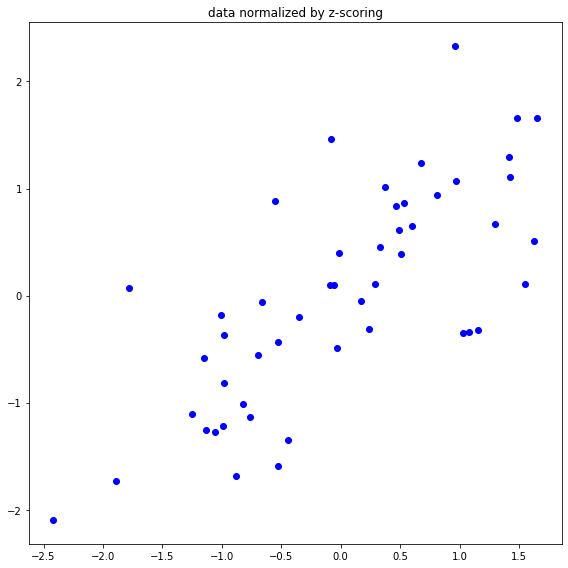

In [15]:
def normalize(feature):
    x = feature[:,0]
    y = feature[:,1]
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)

    x = (x-mean_x) / std_x
    y = (y-mean_y) / std_y
    return x, y
normalize(feature)
print('mean of x =', mean_x)
print('mean of y =', mean_y)
print('std of x =', std_x)
print('std of y =', std_y)

def plot_normalize(x,y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.plot(x, y, 'o', color = 'blue')
    plt.tight_layout()
    plt.show()
    
plot_normalize(x,y)

## compute covariance matrix

In [16]:
def compute_covariance(feature):
    Sigma = np.cov(np.transpose(feature))
    return Sigma

## compute principal directions

In [17]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    return S, U

In [18]:
X = compute_covariance(feature)

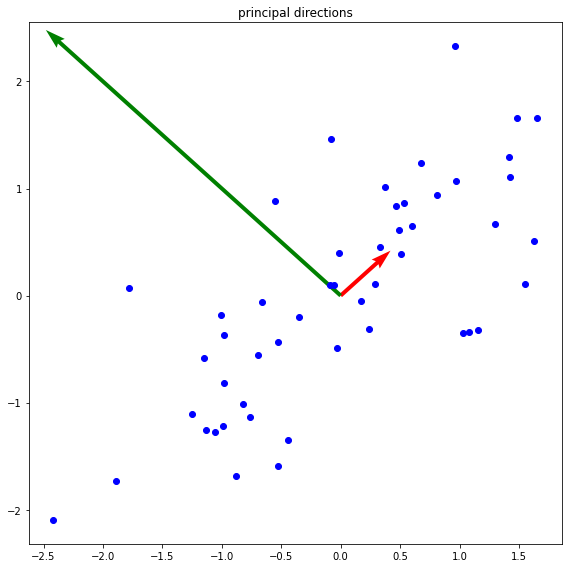

In [36]:
def plot_principal(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature)
    
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,0]
    eigen_2S, eigen_2U = compute_eigen(X)[1][:,1]
    eigen_1 = compute_eigen(X)[0][0]
    eigen_2 = compute_eigen(X)[0][1]
    
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    plt.plot(x, y, 'o', color = 'blue')
    plt.quiver(0,0,eigen_1S, eigen_1U, angles='xy', color='red', scale=eigen_1, scale_units='x')
    plt.quiver(0,0,eigen_2S, eigen_2U, angles='xy', color='green', scale=eigen_2, scale_units='y')
    plt.tight_layout()
    plt.show()
plot_principal(feature)

## first principal axis

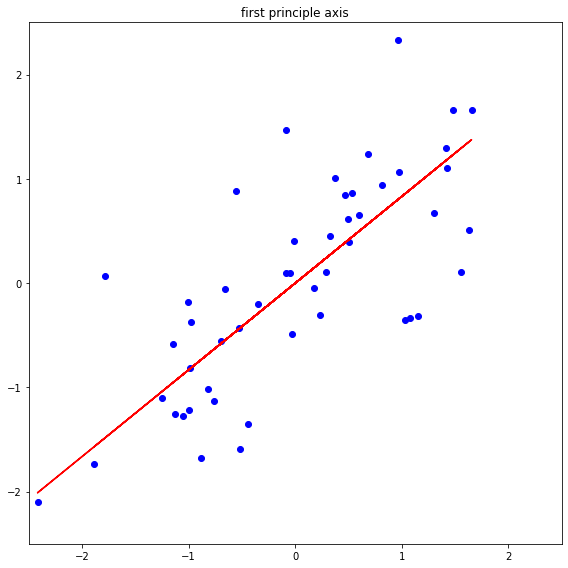

In [25]:
def plot_first(X):    
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,0]
    x, y = normalize(feature)
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red') 
    
    plt.tight_layout()
    plt.show()
    
plot_first(X)

## second principal axis

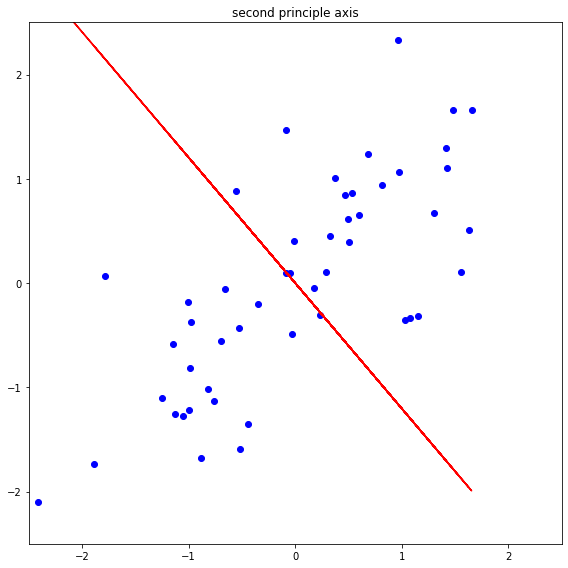

In [26]:
def plot_second(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature)    
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,1]
    
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red') 
    
    plt.tight_layout()
    plt.show()
    
plot_second(feature)

## compute the projection of point onto the line

In [30]:
def compute_projection_onto_line(v0, v1):
    x, y = normalize(feature)
    feature[:,0]=x
    feature[:,1]=y
    vector = np.array([v0, v1])
    square = np.square(np.linalg.norm(vector))
    projection = []
    
    for i in feature:
        a = i.dot(vector)
        projection.append([(v0*a)/square,(v1*a)/square])
    
    projection = np.array(projection)
    return projection

## projcet to the first principal axis

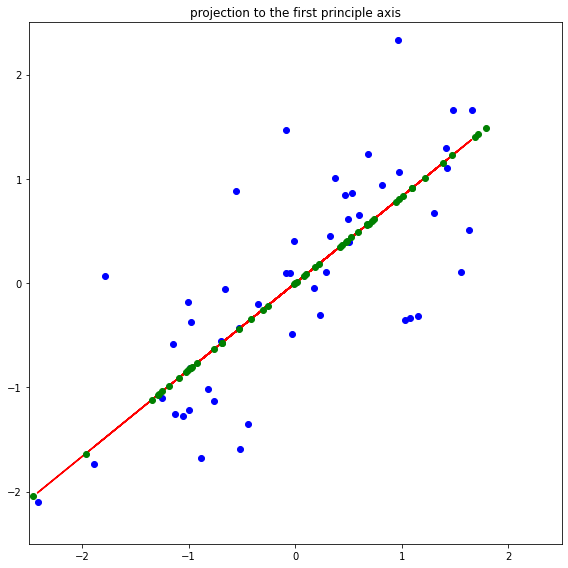

In [31]:
def plot_firstp(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature) 
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,0]
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red')
    
    r = compute_projection_onto_line(eigen_1S, eigen_1U)
    plt.plot(r[:,0], r[:,1], 'o', color='green')
    
    plt.tight_layout()
    plt.show()
plot_firstp(feature)    

## projcet to the second principal axis

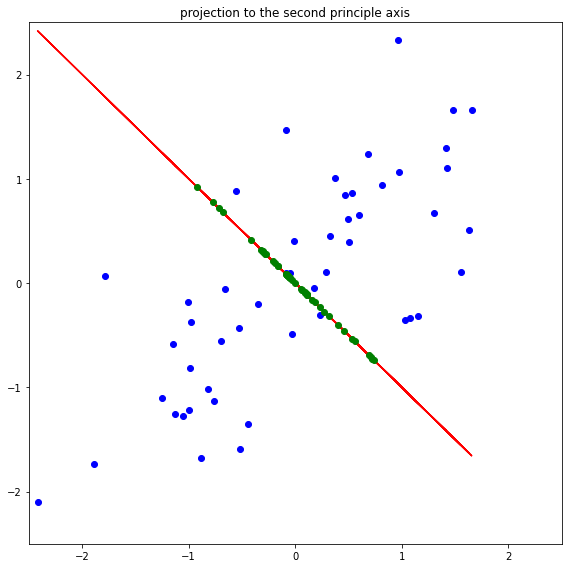

In [32]:
def plot_secondp(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature) 
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,1]
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red')
    
    r = compute_projection_onto_line(eigen_1S, eigen_1U)
    plt.plot(r[:,0], r[:,1], 'o', color='green')
    
    plt.tight_layout()
    plt.show()
plot_secondp(feature)  

## connect original data to the projection onto the first principal axis

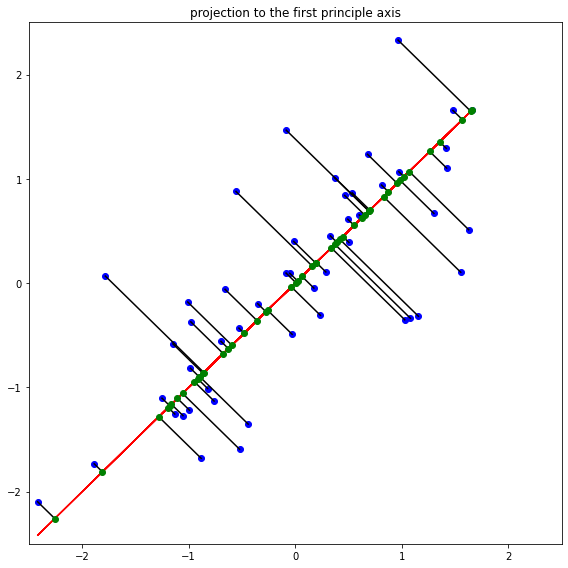

In [33]:
def plot_firstcon(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature) 
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,0]
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red')
    
    r = compute_projection_onto_line(eigen_1S, eigen_1U)
    plt.plot(r[:,0], r[:,1], 'o', color='green', zorder=10)
    
    for i in range(0, number_data):
        plt.plot([feature[i][0], r[i][0]], [feature[i][1],r[i][1]], '-', color='black')
    
    plt.tight_layout()
    plt.show()
plot_firstcon(feature)

## connect original data to the projection onto the second principal axis

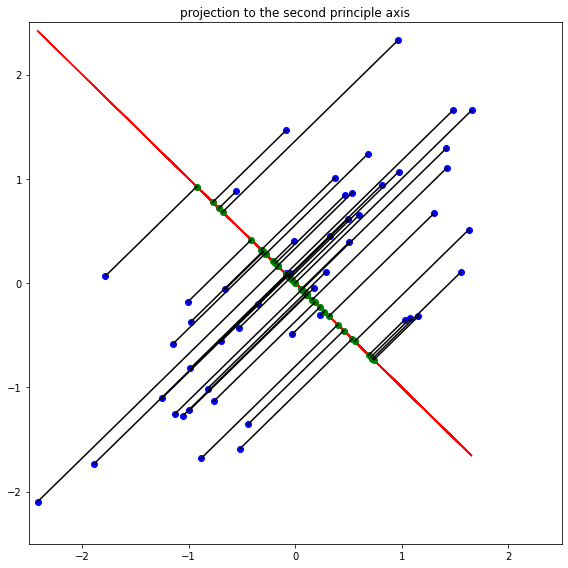

In [34]:
def plot_secondcon(feature):
    x, y = normalize(feature)
    X = compute_covariance(feature) 
    eigen_1S, eigen_1U = compute_eigen(X)[1][:,1]
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    plt.plot(x, y, 'o', color = 'blue')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    z = eigen_1U / eigen_1S
    yy = z*x
    plt.plot(x, yy, '-', color='red')
    
    r = compute_projection_onto_line(eigen_1S, eigen_1U)
    plt.plot(r[:,0], r[:,1], 'o', color='green')
    
    for i in range(0, number_data):
        plt.plot([feature[i][0],r[i][0]],[feature[i][1],r[i][1]],'-',color='black')
    
    plt.tight_layout()
    plt.show()
plot_secondcon(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

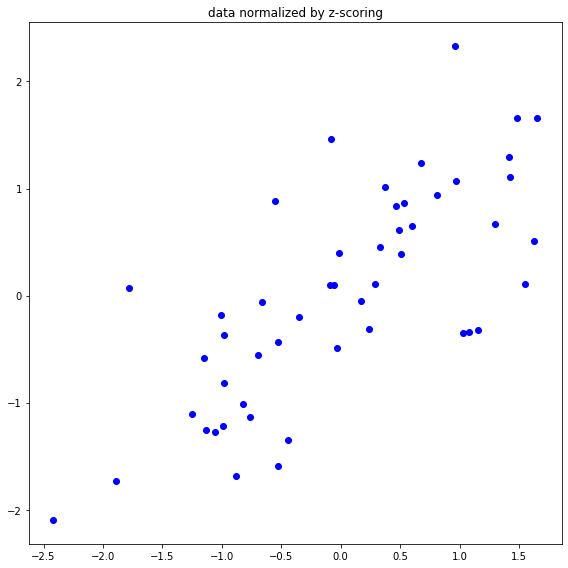

In [35]:
plot_normalize(x,y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

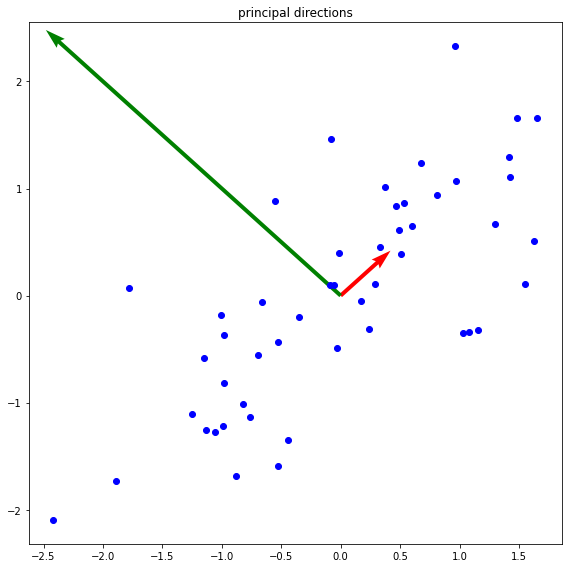

In [37]:
plot_principal(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

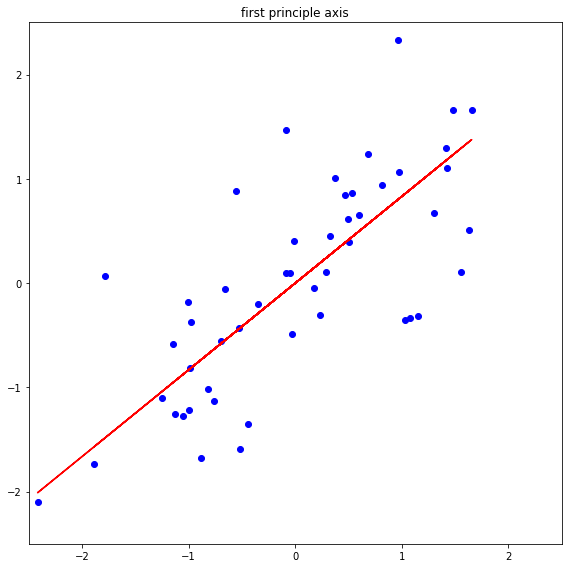

In [38]:
plot_first(X)

***

### 4. plot the second principal axis in red on the normalized data in blue

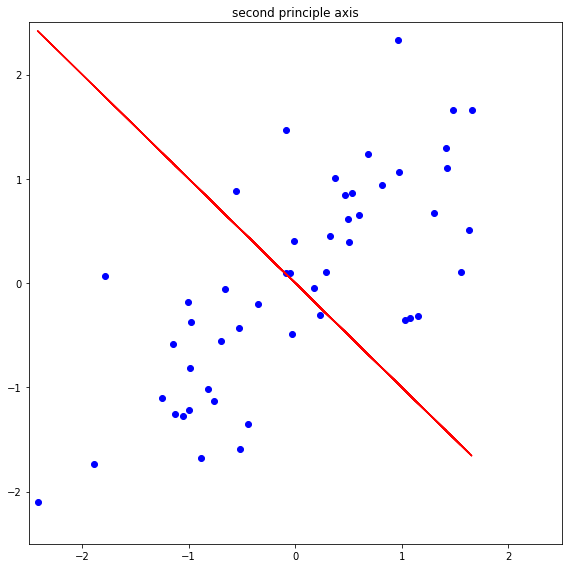

In [39]:
plot_second(feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

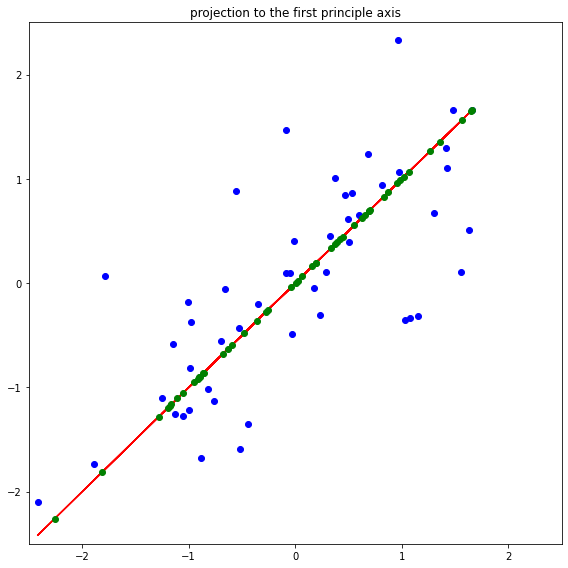

In [40]:
plot_firstp(feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

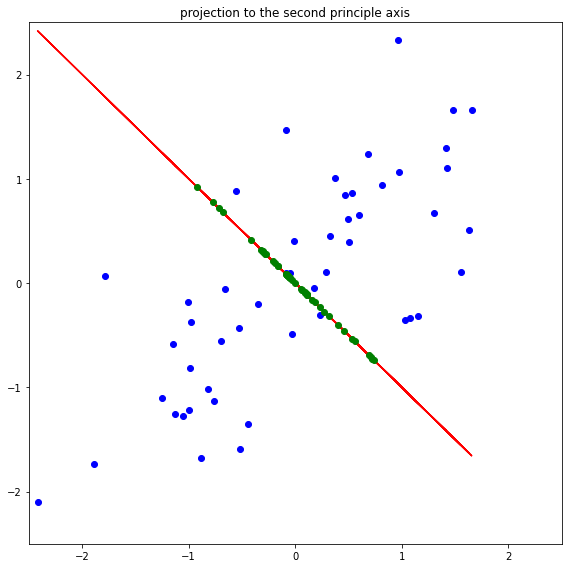

In [41]:
plot_secondp(feature)

***

### 7. plot the projection line in grey onto the first principal axis

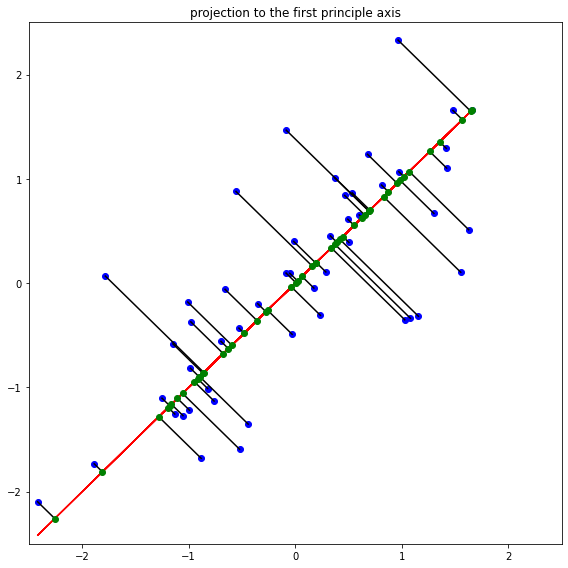

In [42]:
plot_firstcon(feature)

***

### 8. plot the projection line in grey onto the second principal axis

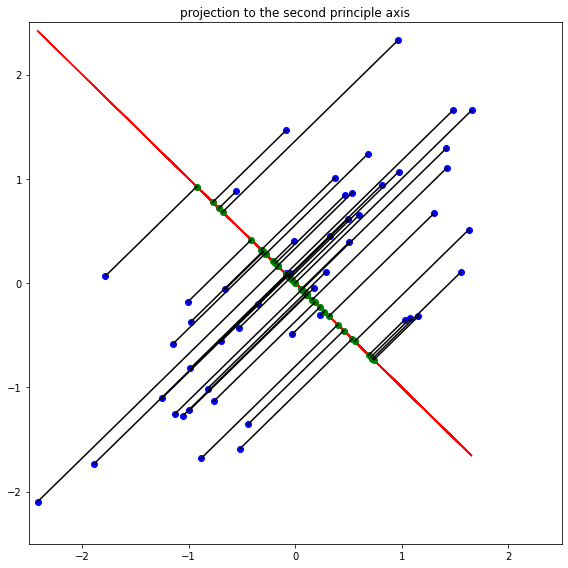

In [44]:
plot_secondcon(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***